In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind, norm

In [2]:
#load file 
tokyo_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_listings.csv', encoding='utf-8')
tokyo_listing.describe()


C:\Users\ysy\AppData\Local\Temp\ipykernel_127436\4052910380.py:2: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  tokyo_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_listings.csv', encoding='utf-8')


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.651800e+04,1.651800e+04,1.651800e+04,16518.000000,16518.000000,0.0,16518.000000,16518.000000,16518.000000,14901.000000,...,14580.000000,14580.000000,14580.000000,14580.000000,14579.000000,16518.000000,16518.000000,16518.000000,16518.000000,14597.000000
mean,5.816491e+17,2.024060e+13,2.929799e+08,20.568592,28.655769,NaN,35.698748,139.736294,4.351132,1.229917,...,4.684619,4.768337,4.819169,4.693145,4.642963,16.109335,12.988437,2.268011,0.769948,1.725777
std,4.970662e+17,0.000000e+00,1.846269e+08,29.226756,44.749161,NaN,0.041095,0.072995,2.964171,0.822841,...,0.365584,0.301132,0.265155,0.296301,0.342805,19.674860,17.571182,5.533676,5.585877,1.666601
min,1.976770e+05,2.024060e+13,3.222340e+05,1.000000,1.000000,NaN,35.520940,139.081322,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,4.144522e+07,2.024060e+13,1.290963e+08,4.000000,5.000000,NaN,35.688305,139.699183,2.000000,1.000000,...,4.560000,4.690000,4.750000,4.580000,4.530000,3.000000,2.000000,0.000000,0.000000,0.730000
50%,8.301175e+17,2.024060e+13,2.721294e+08,10.000000,13.000000,NaN,35.703990,139.728136,4.000000,1.000000,...,4.780000,4.850000,4.890000,4.750000,4.700000,9.000000,6.000000,0.000000,0.000000,1.370000
75%,1.040938e+18,2.024060e+13,4.923137e+08,24.000000,33.000000,NaN,35.722587,139.790456,6.000000,1.000000,...,4.930000,4.960000,5.000000,4.880000,4.850000,19.000000,16.000000,1.000000,0.000000,2.350000
max,1.189050e+18,2.024060e+13,5.859819e+08,229.000000,482.000000,NaN,35.840764,139.914020,16.000000,19.500000,...,5.000000,5.000000,5.000000,5.000000,5.000000,106.000000,92.000000,35.000000,58.000000,53.640000


C:\Users\ysy\AppData\Local\Temp\ipykernel_127436\2323280292.py:2: DtypeWarning: Columns (59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  tokyo_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_listings.csv', encoding='utf-8')


Listing ID: 8.06763e+17, Number of Reviews: 58, Price (SGD): 223.26, Review Score: 5.0
Listing ID: 12078617.0, Number of Reviews: 46, Price (SGD): 141.42, Review Score: 5.0
Listing ID: 4606903.0, Number of Reviews: 40, Price (SGD): 176.0, Review Score: 5.0
Listing ID: 8.01742e+17, Number of Reviews: 48, Price (SGD): 222.31, Review Score: 5.0
Listing ID: 7281726.0, Number of Reviews: 43, Price (SGD): 88.0, Review Score: 5.0
Listing ID: 1.02992e+18, Number of Reviews: 33, Price (SGD): 458.77, Review Score: 5.0
Listing ID: 8.40986e+17, Number of Reviews: 34, Price (SGD): 386.7, Review Score: 5.0
Listing ID: 37339582.0, Number of Reviews: 35, Price (SGD): 346.39, Review Score: 5.0
Listing ID: 1.03085e+18, Number of Reviews: 30, Price (SGD): 443.59, Review Score: 5.0
Listing ID: 35787116.0, Number of Reviews: 57, Price (SGD): 152.12, Review Score: 5.0
Listing ID: 1.03359e+18, Number of Reviews: 31, Price (SGD): 178.52, Review Score: 5.0
Listing ID: 8.40594e+17, Number of Reviews: 101, Price

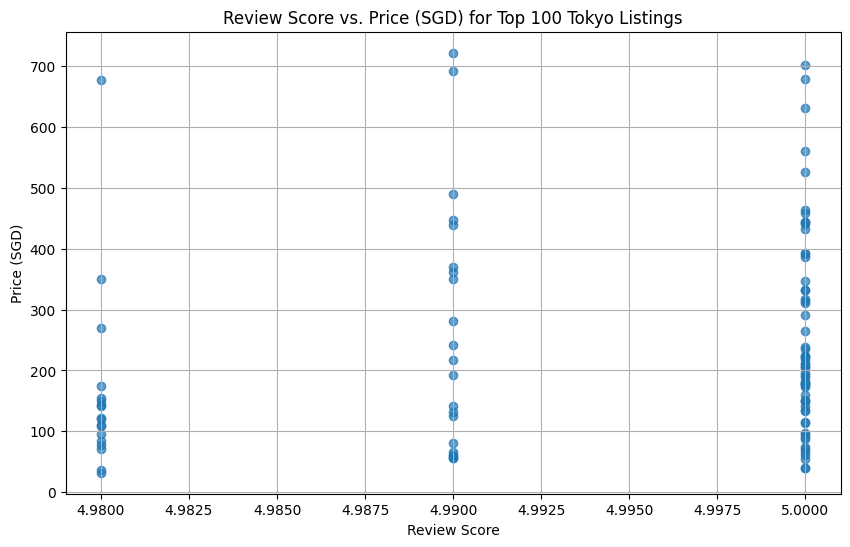

In [3]:
#load file 
tokyo_listing = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\tokyo_listings.csv', encoding='utf-8')
tokyo_listing.describe()

# Drop rows where 'price' is NaN
tokyo_listing = tokyo_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = tokyo_listing[tokyo_listing['number_of_reviews'] >= 30]

# Extract the top 100 listings with the highest review scores from the filtered data
top_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=False).head(100)

# Select relevant columns
top_listing_ids = top_100_listings['id']
top_listing_prices = top_100_listings['price']
top_review_scores = top_100_listings['review_scores_rating']

# Convert prices to SGD
yen_to_sgd = 0.0088
top_tokyo_listing_prices_sgd = (top_listing_prices * yen_to_sgd).round(2)

# Convert columns to lists for iteration
top_listing_ids_list = top_listing_ids.tolist()
top_tokyo_listing_prices_list = top_tokyo_listing_prices_sgd.tolist()
top_review_scores_list = top_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(top_listing_ids_list, top_tokyo_listing_prices_list, top_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = tokyo_listing.loc[tokyo_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = tokyo_listing.loc[tokyo_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")


# # Filter out listings with very high prices (assuming 1000 SGD as an upper limit)
# filtered_prices = [price for price in top_tokyo_listing_prices_list if price < 1000]
# filtered_scores = [score for price, score in zip(top_tokyo_listing_prices_list, top_review_scores_list) if price < 1000]

# Plot review score vs. price (SGD) without outliers
plt.figure(figsize=(10, 6))
plt.scatter(top_review_scores_list, top_tokyo_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Top 100 Tokyo Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()

Listing ID: 9.04109e+17, Number of Reviews: 57, Price (SGD): 20.12, Review Score: 3.51
Listing ID: 53334000.0, Number of Reviews: 34, Price (SGD): 43.2, Review Score: 3.59
Listing ID: 6.69809e+17, Number of Reviews: 33, Price (SGD): 110.62, Review Score: 3.88
Listing ID: 9.32531e+17, Number of Reviews: 33, Price (SGD): 85.98, Review Score: 3.94
Listing ID: 38735321.0, Number of Reviews: 35, Price (SGD): 94.28, Review Score: 4.0
Listing ID: 30572569.0, Number of Reviews: 30, Price (SGD): 54.3, Review Score: 4.0
Listing ID: 51695746.0, Number of Reviews: 42, Price (SGD): 193.6, Review Score: 4.02
Listing ID: 43605903.0, Number of Reviews: 68, Price (SGD): 136.4, Review Score: 4.04
Listing ID: 52309662.0, Number of Reviews: 45, Price (SGD): 57.46, Review Score: 4.04
Listing ID: 9.32458e+17, Number of Reviews: 31, Price (SGD): 85.24, Review Score: 4.06
Listing ID: 40313970.0, Number of Reviews: 72, Price (SGD): 105.34, Review Score: 4.07
Listing ID: 6.6033e+17, Number of Reviews: 30, Price

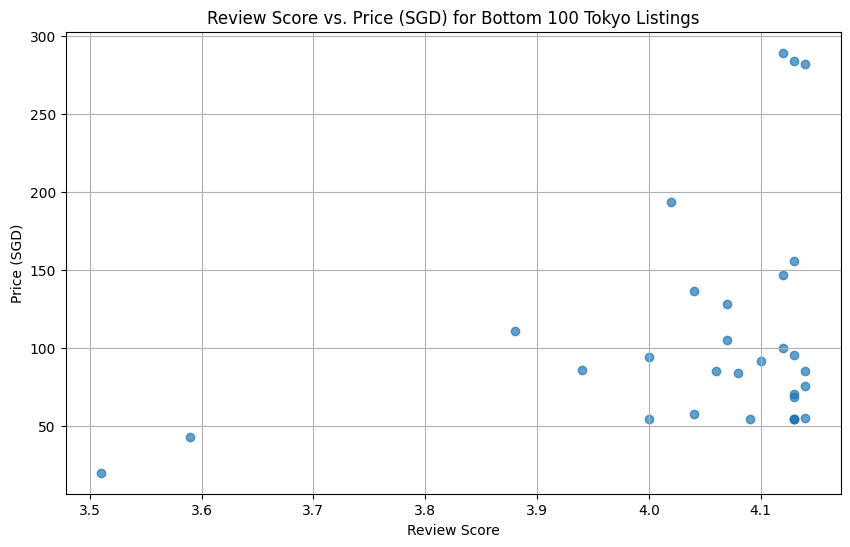

In [4]:
# Drop rows where 'price' is NaN
tokyo_listing = tokyo_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = tokyo_listing[tokyo_listing['number_of_reviews'] >= 30]

# Extract the bottom 30 listings with the lowest review scores from the filtered data
bottom_30_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=True).head(30)

# Select relevant columns
bottom_listing_ids = bottom_30_listings['id']
bottom_listing_prices = bottom_30_listings['price']
bottom_review_scores = bottom_30_listings['review_scores_rating']

# Convert prices to SGD
yen_to_sgd = 0.0088
bottom_tokyo_listing_prices_sgd = (bottom_listing_prices * yen_to_sgd).round(2)

# Convert columns to lists for iteration
bottom_listing_ids_list = bottom_listing_ids.tolist()
bottom_tokyo_listing_prices_list = bottom_tokyo_listing_prices_sgd.tolist()
bottom_review_scores_list = bottom_review_scores.tolist()

# Print out listing information including review scores rating
for listing_id, price_sgd, review_score in zip(bottom_listing_ids_list, bottom_tokyo_listing_prices_list, bottom_review_scores_list):
    # Get the number of reviews for each listing ID
    num_reviews = tokyo_listing.loc[tokyo_listing['id'] == listing_id, 'number_of_reviews'].values[0]
    price = tokyo_listing.loc[tokyo_listing['id'] == listing_id, 'price'].values[0]
    print(f"Listing ID: {listing_id}, Number of Reviews: {num_reviews}, Price (SGD): {price_sgd}, Review Score: {review_score}")


plt.figure(figsize=(10, 6))
plt.scatter(bottom_review_scores_list, bottom_tokyo_listing_prices_list, alpha=0.7)
plt.title('Review Score vs. Price (SGD) for Bottom 100 Tokyo Listings')
plt.xlabel('Review Score')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()


In [5]:
# Drop rows where 'price' is NaN
tokyo_listing = tokyo_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = tokyo_listing[tokyo_listing['number_of_reviews'] >= 30]

# Extract the top 100 listings with the highest review scores from the filtered data
top_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=False).head(100)

# Convert prices to SGD using the JPY to SGD conversion rate
yen_to_sgd = 0.0088
top_100_listings['price_sgd'] = (top_100_listings['price'] * yen_to_sgd).round(2)

# Save the DataFrame to a new CSV file
top_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_tokyo_listings.csv', index=False)

print("Data saved to top_100_tokyo_listings.csv")

# Drop rows where 'price' is NaN
tokyo_listing = tokyo_listing.dropna(subset=['price'])

# Filter listings with at least 30 reviews
filtered_listings = tokyo_listing[tokyo_listing['number_of_reviews'] >= 30]

# Extract the bottom 100 listings with the lowest review scores from the filtered data
bottom_100_listings = filtered_listings.sort_values(by='review_scores_rating', ascending=True).head(100)

# Convert prices to SGD using the JPY to SGD conversion rate
yen_to_sgd = 0.0088
bottom_100_listings['price_sgd'] = (bottom_100_listings['price'] * yen_to_sgd).round(2)

# Save the DataFrame to a new CSV file
bottom_100_listings.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_tokyo_listings.csv', index=False)

print("Data saved to bottom_100_tokyo_listings.csv")


Data saved to top_100_tokyo_listings.csv
Data saved to bottom_100_tokyo_listings.csv


In [6]:
# Load the two CSV files into DataFrames
top_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\top_100_tokyo_listings.csv')
bottom_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\bottom_100_tokyo_listings.csv')

# Concatenate the two DataFrames
top_bottom_100 = pd.concat([top_100, bottom_100], ignore_index=True)

# Save the combined DataFrame to a new CSV file
top_bottom_100.to_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_tokyo_listings.csv', index=False)

print("Data saved to combined_top_bottom_tokyo_listings.csv")

Data saved to combined_top_bottom_tokyo_listings.csv


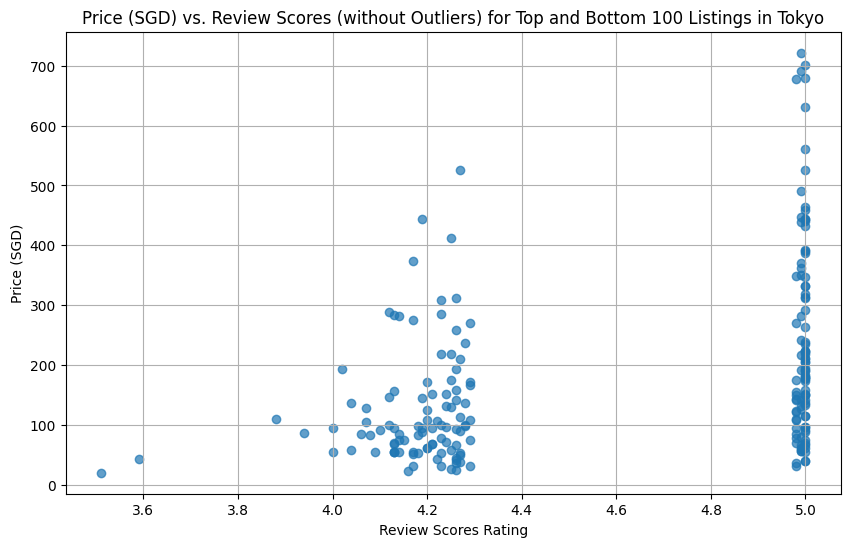

In [7]:
top_bottom_tokyo_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_tokyo_listings.csv')

plt.figure(figsize=(10, 6))
plt.scatter(top_bottom_tokyo_100['review_scores_rating'], top_bottom_tokyo_100['price_sgd'], alpha=0.7)
plt.title('Price (SGD) vs. Review Scores (without Outliers) for Top and Bottom 100 Listings in Tokyo')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price (SGD)')
plt.grid(True)
plt.show()

In [8]:
# Define high and low review score groups (e.g., above 4.5 as high)
high_score_group = top_bottom_tokyo_100[top_bottom_tokyo_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_tokyo_100[top_bottom_tokyo_100['review_scores_rating'] <= 4.5]['price_sgd']

# Perform the independent t-test
t_stat, p_value = ttest_ind(high_score_group, low_score_group, equal_var=False, alternative='two-sided')  # Using Welch's t-test
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")


T-Statistic: 5.720240921022757, P-Value: 5.233613748965008e-08
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


In [10]:
# Separate groups based on a review score threshold (e.g., 4.5)
high_score_group = top_bottom_tokyo_100[top_bottom_tokyo_100['review_scores_rating'] > 4.5]['price_sgd']
low_score_group = top_bottom_tokyo_100[top_bottom_tokyo_100['review_scores_rating'] <= 4.5]['price_sgd']

# Calculate means and standard deviations
mean_high_score = np.mean(high_score_group)
mean_low_score = np.mean(low_score_group)
std_high_score = np.std(high_score_group, ddof=1)  # sample standard deviation
std_low_score = np.std(low_score_group, ddof=1)    # sample standard deviation
n_high = len(high_score_group)
n_low = len(low_score_group)
alpha = 0.05 

# Calculate the z-score
z_score = (mean_high_score - mean_low_score) / np.sqrt((std_high_score**2 / n_high) + (std_low_score**2 / n_low))

#calculate critical value
critical_value = stats.norm.ppf(1-alpha/2) 

# Calculate the p-value for a two-tailed test
p_value = 2 * stats.norm.sf(abs(z_score))


# Display results
print(f"Mean Price (High Score): {mean_high_score}")
print(f"Mean Price (Low Score): {mean_low_score}")
print(f"Z-Score: {z_score}")
print(f"P-Value: {p_value}")
print(f"Critical Value: {critical_value}")

# Interpretation
 # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average prices between the groups.")

Mean Price (High Score): 238.34609999999992
Mean Price (Low Score): 125.62069999999999
Z-Score: 5.720240921022757
P-Value: 1.0637311287210972e-08
Critical Value: 1.959963984540054
Reject the null hypothesis: There is a significant difference in average prices between high and low review score groups.


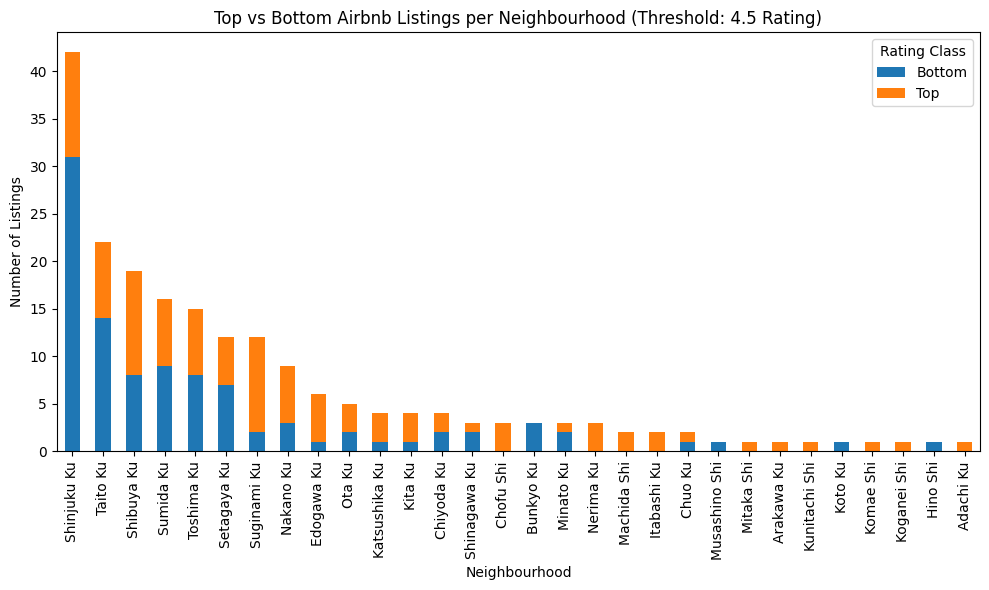

In [12]:
top_bottom_tokyo_100['Rating_Class'] = ['Top' if rating > 4.5 else 'Bottom' for rating in top_bottom_tokyo_100['review_scores_rating']]

# Group by neighbourhood and rating class to get counts
neighbourhood_counts = top_bottom_tokyo_100.groupby(['neighbourhood_cleansed', 'Rating_Class']).size().unstack(fill_value=0)

neighbourhood_counts['Total'] = neighbourhood_counts.sum(axis=1)
neighbourhood_counts = neighbourhood_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plotting
neighbourhood_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Top vs Bottom Airbnb Listings per Neighbourhood (Threshold: 4.5 Rating)')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.legend(title='Rating Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


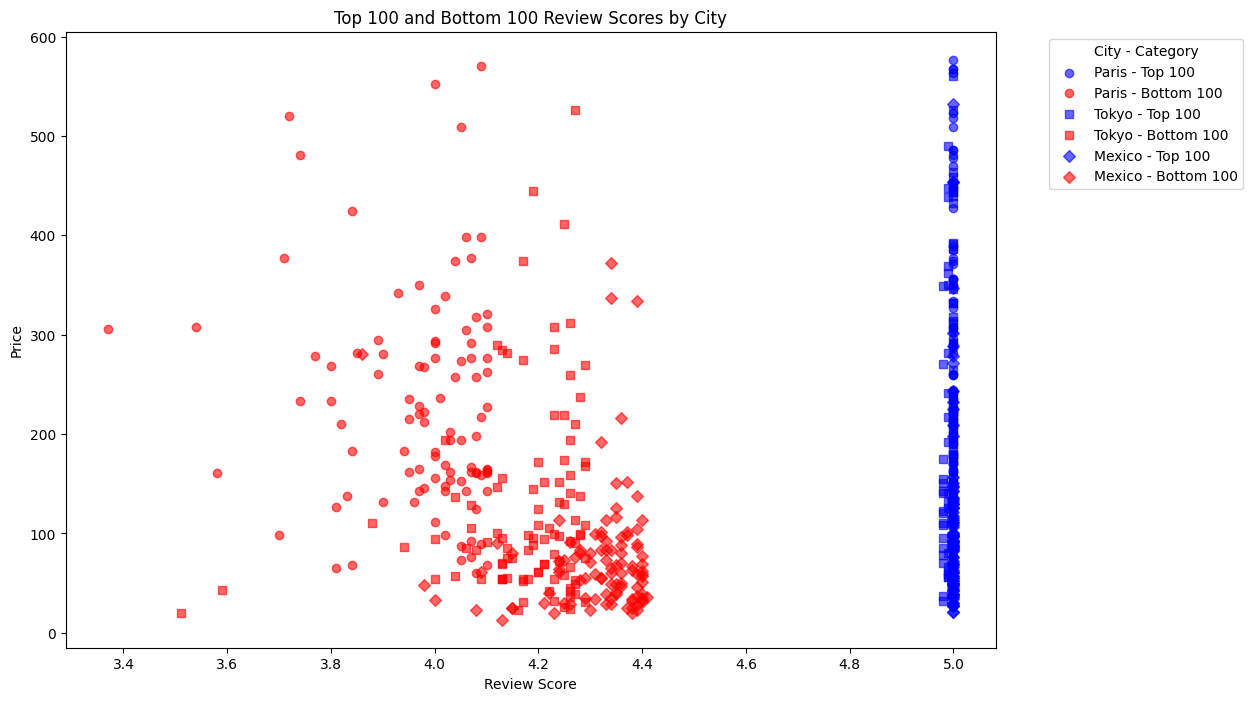

In [23]:
top_bottom_tokyo_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_tokyo_listings.csv')
top_bottom_paris_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_paris_listings.csv')
top_bottom_mexico_100 = pd.read_csv(r'C:\Users\ysy\Documents\IS630_ Stats thinking for data science\Assignment\Group Assignment\airbnb_datasets_py_files\combined_top_bottom_mexico_listings.csv')

# Add a "City" column to identify data from each city
top_bottom_tokyo_100['City'] = 'Tokyo'
top_bottom_paris_100['City'] = 'Paris'
top_bottom_mexico_100['City'] = 'Mexico'

def categorize_scores(df, threshold=4.5):
    # Apply conditions based on the threshold
    df['Category'] = df['review_scores_rating'].apply(lambda x: 'Top 100' if x > threshold else 'Bottom 100')
    
    return df

# Apply the categorization function to each DataFrame
paris_data = categorize_scores(top_bottom_paris_100, threshold=4.5)
tokyo_data = categorize_scores(top_bottom_tokyo_100, threshold=4.5)
mexico_data = categorize_scores(top_bottom_mexico_100, threshold=4.5)

# Combine all data into a single DataFrame
data = pd.concat([paris_data, tokyo_data, mexico_data], ignore_index=True)

Q1 = data['price_sgd'].quantile(0.25)
Q3 = data['price_sgd'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_filtered = data[(data['price_sgd'] >= lower_bound) & (data['price_sgd'] <= upper_bound)]

plt.figure(figsize=(12, 8))

# Define colors and markers for each category and city
colors = {'Top 100': 'blue', 'Bottom 100': 'red'}
markers = {'Paris': 'o', 'Tokyo': 's', 'Mexico': 'D'}

# Scatter plot for each city and category
for city in data['City'].unique():
    for category in colors.keys():
        # Filter data for each city and category
        city_category_data = data_filtered[(data_filtered['City'] == city) & (data_filtered['Category'] == category)]
        
        # Plot each subset with specific color and marker
        plt.scatter(city_category_data['review_scores_rating'], city_category_data['price_sgd'],
                    c=colors[category], marker=markers[city],
                    label=f"{city} - {category}", alpha=0.6)

# Add plot labels and legend
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.title('Top 100 and Bottom 100 Review Scores by City')
plt.legend(title="City - Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()